In [1]:
#Configure Jupyter-notebook NBextensions -> Execute Time and Table of Contents (2)

In [2]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.interactive(True)
%matplotlib inline


### Hospital Especializado

In [3]:
# estabelecimentos = pd.read_csv('../data/Estabelecimentos- Hospital Especializado2.csv', sep=';', skiprows=3, encoding='latin1')

### Convert to Excel with remove lines (drive)


In [4]:
estabelecimentos = pd.read_excel('../data/Estabelecimentos- Hospital Especializado2.xlsx')

In [5]:
len(estabelecimentos.columns)

61

In [6]:
#Adjust Names
new_names = ['Municipio',
             '2014/Jan', '2014/Fev', '2014/Mar', '2014/Abr', '2014/Mai', '2014/Jun', '2014/Jul', '2014/Ago', '2014/Set', '2014/Out', '2014/Nov', '2014/Dez',
             '2015/Jan', '2015/Fev', '2015/Mar', '2015/Abr', '2015/Mai', '2015/Jun', '2015/Jul', '2015/Ago', '2015/Set', '2015/Out', '2015/Nov', '2015/Dez',
             '2016/Jan', '2016/Fev', '2016/Mar', '2016/Abr', '2016/Mai', '2016/Jun', '2016/Jul', '2016/Ago', '2016/Set', '2016/Out', '2016/Nov', '2016/Dez',
             '2017/Jan', '2017/Fev', '2017/Mar', '2017/Abr', '2017/Mai', '2017/Jun', '2017/Jul', '2017/Ago', '2017/Set', '2017/Out', '2017/Nov', '2017/Dez',
             '2018/Jan', '2018/Fev', '2018/Mar', '2018/Abr', '2018/Mai', '2018/Jun', '2018/Jul', '2018/Ago', '2018/Set', '2018/Out', '2018/Nov', '2018/Dez']

In [7]:
len(new_names)

61

In [8]:
# Set New Names
# set(estabelecimentos.columns) == set(new_names)
est_hosp = estabelecimentos.set_axis(new_names, axis=1, inplace = False)

In [9]:
est_hosp.shape

(5598, 61)

### Exclude duplicate data -> Nao Necessario


In [10]:
# #Sort Data
# est_hosp.sort_values("Municipio", inplace = True) 

# #Collum see equal data
# collum_property_id = est_hosp['Municipio']

# # dropping ALL duplicte values 
# est_hosp.drop_duplicates(subset ="Municipio", keep = False, inplace = True)

#Exclude the last (2) lines
est_hosp = est_hosp.drop(est_hosp.index[5597])
est_hosp = est_hosp.drop(est_hosp.index[5596])


### Type Data

In [11]:
# est_hosp.dtypes

new_names = ['2014/Jan', '2014/Fev', '2014/Mar', '2014/Abr', '2014/Mai', '2014/Jun', '2014/Jul', '2014/Ago', '2014/Set', '2014/Out', '2014/Nov', '2014/Dez',
             '2015/Jan', '2015/Fev', '2015/Mar', '2015/Abr', '2015/Mai', '2015/Jun', '2015/Jul', '2015/Ago', '2015/Set', '2015/Out', '2015/Nov', '2015/Dez',
             '2016/Jan', '2016/Fev', '2016/Mar', '2016/Abr', '2016/Mai', '2016/Jun', '2016/Jul', '2016/Ago', '2016/Set', '2016/Out', '2016/Nov', '2016/Dez',
             '2017/Jan', '2017/Fev', '2017/Mar', '2017/Abr', '2017/Mai', '2017/Jun', '2017/Jul', '2017/Ago', '2017/Set', '2017/Out', '2017/Nov', '2017/Dez',
             '2018/Jan', '2018/Fev', '2018/Mar', '2018/Abr', '2018/Mai', '2018/Jun', '2018/Jul', '2018/Ago', '2018/Set', '2018/Out', '2018/Nov', '2018/Dez']
#Convert to value! just Convert '-' to NaN
est_hosp = est_hosp.replace('-',np.NaN)


### Describe data

In [12]:
est_hosp.describe()
print(est_hosp.describe())

         2014/Jan    2014/Fev    2014/Mar    2014/Abr    2014/Mai    2014/Jun  \
count  249.000000  250.000000  250.000000  252.000000  251.000000  251.000000   
mean     4.405622    4.380000    4.404000    4.361111    4.346614    4.342629   
std      9.858685    9.801012    9.818881    9.747845    9.659989    9.664478   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      3.000000    3.000000    3.000000    3.000000    3.000000    3.000000   
max    104.000000  103.000000  103.000000  102.000000  100.000000  100.000000   

         2014/Jul    2014/Ago    2014/Set    2014/Out  ...    2018/Mar  \
count  252.000000  249.000000  249.000000  250.000000  ...  252.000000   
mean     4.329365    4.365462    4.369478    4.372000  ...    4.095238   
std      9.652459    9.670737    9.655770    9.6

In [13]:
# Ou seja, basicamente não houve melhora na elaboração dos dados dependente do mês e até mesmo ano!
est_hosp2 = est_hosp.copy()
quant_NaN_porcent = (est_hosp2.isna().sum() / est_hosp2.shape[0])*100
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(quant_NaN_porcent)

Municipio     0.000000
2014/Jan     95.550393
2014/Fev     95.532523
2014/Mar     95.532523
2014/Abr     95.496783
2014/Mai     95.514653
2014/Jun     95.514653
2014/Jul     95.496783
2014/Ago     95.550393
2014/Set     95.550393
2014/Out     95.532523
2014/Nov     95.550393
2014/Dez     95.532523
2015/Jan     95.675482
2015/Fev     95.675482
2015/Mar     95.693352
2015/Abr     95.693352
2015/Mai     95.693352
2015/Jun     95.675482
2015/Jul     95.675482
2015/Ago     95.657613
2015/Set     95.621873
2015/Out     95.604003
2015/Nov     95.621873
2015/Dez     95.604003
2016/Jan     95.514653
2016/Fev     95.496783
2016/Mar     95.496783
2016/Abr     95.496783
2016/Mai     95.478914
2016/Jun     95.478914
2016/Jul     95.514653
2016/Ago     95.532523
2016/Set     95.550393
2016/Out     95.586133
2016/Nov     95.568263
2016/Dez     95.550393
2017/Jan     95.532523
2017/Fev     95.532523
2017/Mar     95.550393
2017/Abr     95.550393
2017/Mai     95.532523
2017/Jun     95.550393
2017/Jul   

### Separate Line with 60% complete lines without NaN

In [14]:
# a = np.array(est_hosp2.isnull().sum(axis=1))
# saida_f_t = np.reshape(np.asarray([a<25]),[np.asarray([a<25]).shape[1],1])
num = 12 # Ou seja, deve ter no maximo 25 numeros NAN
saida_f_t = np.reshape(np.asarray([np.array(est_hosp2.isnull().sum(axis=1))<num]),[np.asarray([np.array(est_hosp2.isnull().sum(axis=1))<num]).shape[1],1])
# saida_f_t.shape
# sum(saida_f_t)

#Applied 
est_hosp3 = est_hosp.copy()
est_hosp3 = est_hosp3[saida_f_t]

In [15]:
# Break Municipio and Val_Municipio (id = Brasil Region)
est_hosp4 = est_hosp3.copy()
aux_colum = est_hosp4["Municipio"].str.split(" ", n = 1, expand = True)
est_hosp4["Municipio"]= aux_colum[1] 
# est_hosp4["Val_Municipio"]= aux_colum[0]
est_hosp4.insert(0, "Val_Municipio", aux_colum[0].values, True) 

# est_hosp4["Estado"] = est_hosp4["Val_Municipio"].str[0:2]
est_hosp4.insert(0, "Estado",  est_hosp4["Val_Municipio"].str[0:2], True) 

#Convert int
est_hosp4["Estado"] = est_hosp4["Estado"].apply(pd.to_numeric, errors='coerce')
est_hosp4["Val_Municipio"] = est_hosp4["Val_Municipio"].apply(pd.to_numeric, errors='coerce')

# aux = est_hosp4.Val_Municipio.astype(int)
# est_hosp4.dtypes
est_hosp4

,Estado,Val_Municipio,Municipio,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,...,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez
23,11,110012,Ji-Paraná,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
36,11,110020,Porto Velho,7.0,7.0,8.0,7.0,7.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0
58,12,120020,Cruzeiro do Sul,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
68,12,120040,Rio Branco,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
113,13,130260,Manaus,21.0,21.0,21.0,21.0,21.0,21.0,21.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560,52,521975,Santo Antônio do Descoberto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
5571,52,522045,Senador Canedo,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5580,52,522140,Trindade,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5588,52,522185,Valparaíso de Goiás,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Call .csv to separate by states

In [16]:
# #Github
# # states_la_lo = pd.read_csv('../data/municipios_git.csv', sep=';', skiprows=3)
# # states_la_lo


#Tratamento do Dado do Governo (Aprendizado eh q a numeracao do ID vem do estado os dois primeiros valores!)
# #Dados Governo
# states_cid = pd.read_excel('../data/municipios_gov.xls')
# states_cid = states_cid.drop(['Nome_UF',
#                               'Mesorregião Geográfica',
#                               'Microrregião Geográfica',
#                               'Nome_Microrregião',
#                               'Nome_Mesorregião',
#                               'Município'], axis='columns')
# states_cid

### Do Plot for State!

In [17]:
UF = 11,12,13,14,15,16,17,21,22,23,24,25,26,27,28,29,31,32,33,35,41,42,43,50,51,52,53
UF_sig = 'RO','AC','AM','RR','PA','AP','TO','MA','PI','CE','RN','PB','PE','AL','SE','BA','MG','ES','RJ','SP','PR','SC','RS','MS','MT','GO','DF'
state_dict = dict(zip(UF, UF_sig))
state_dict[11]
#São 60 meses ou 5 anos!

'RO'

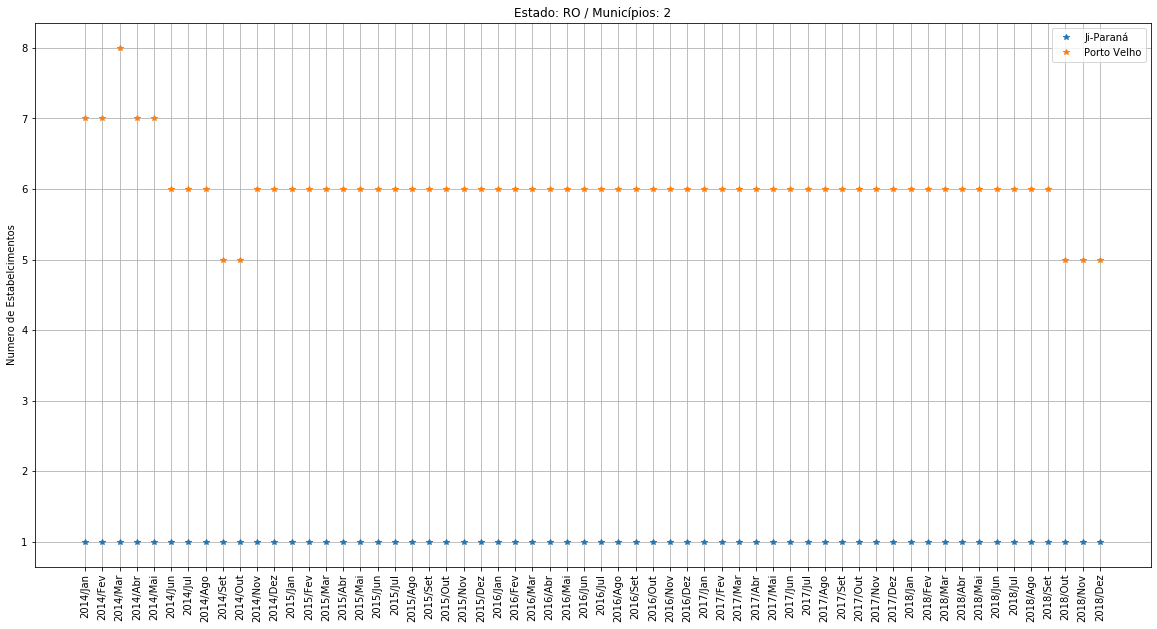

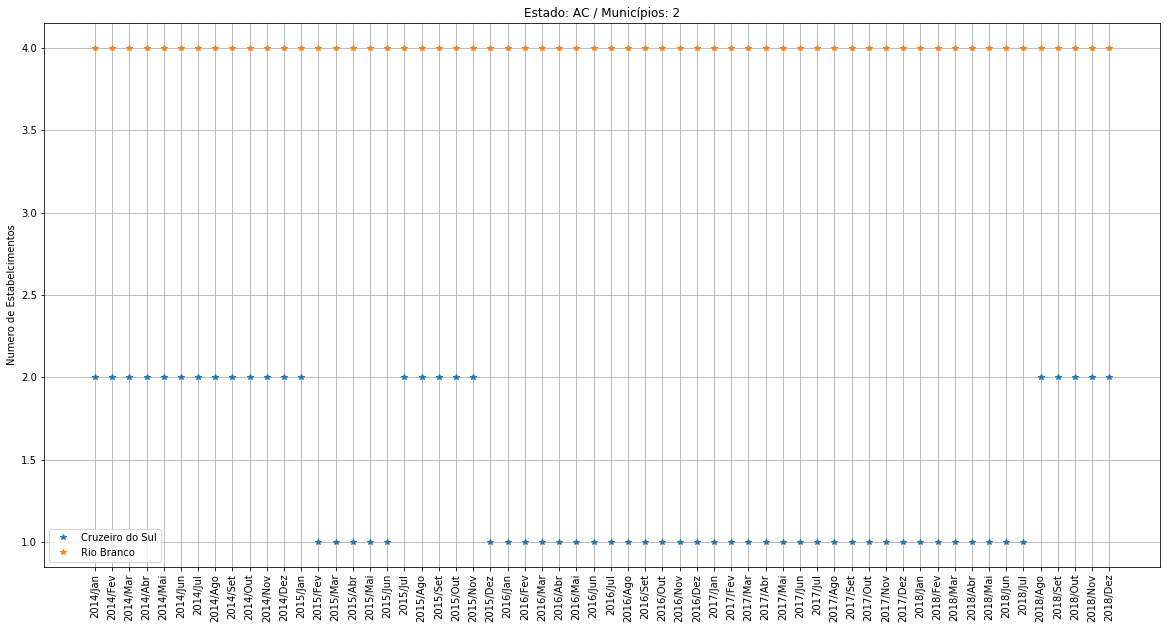

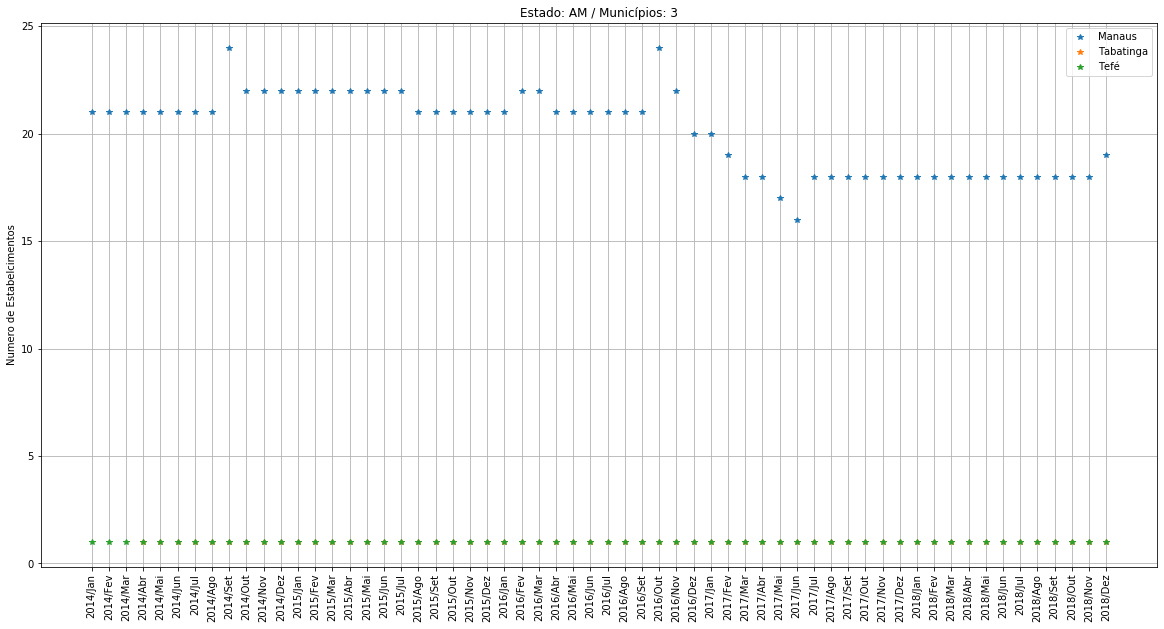

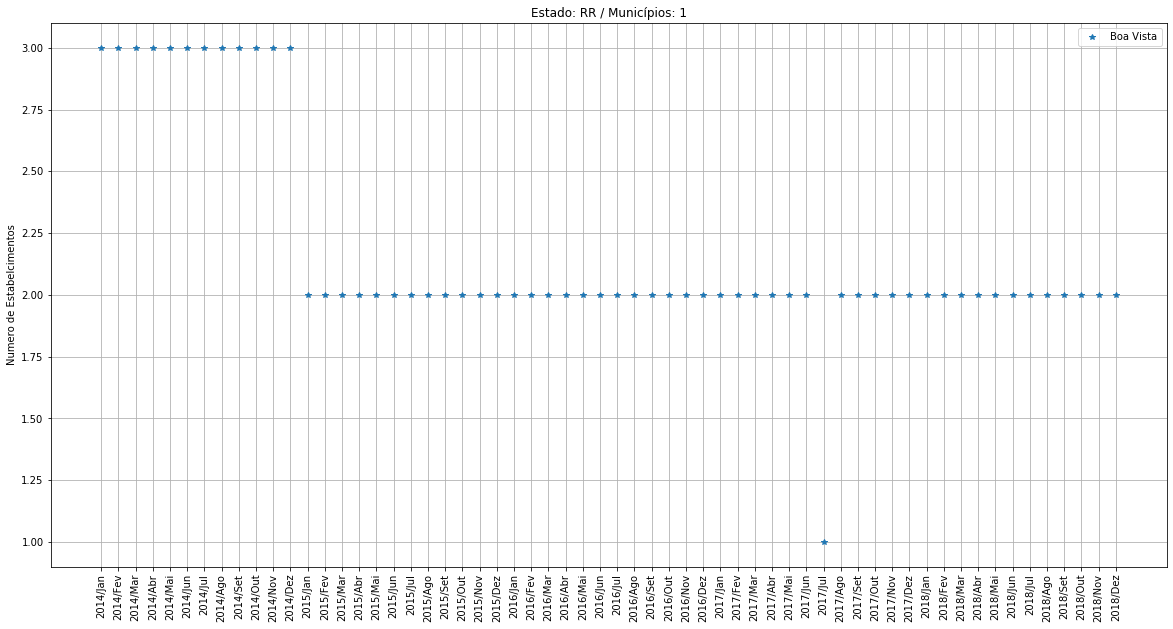

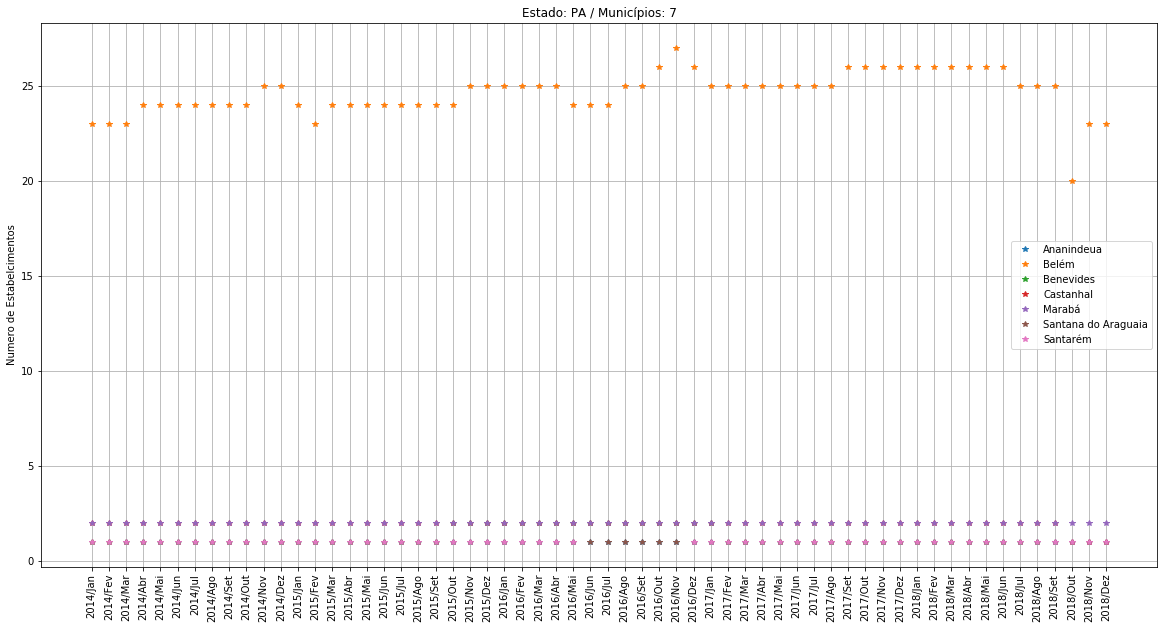

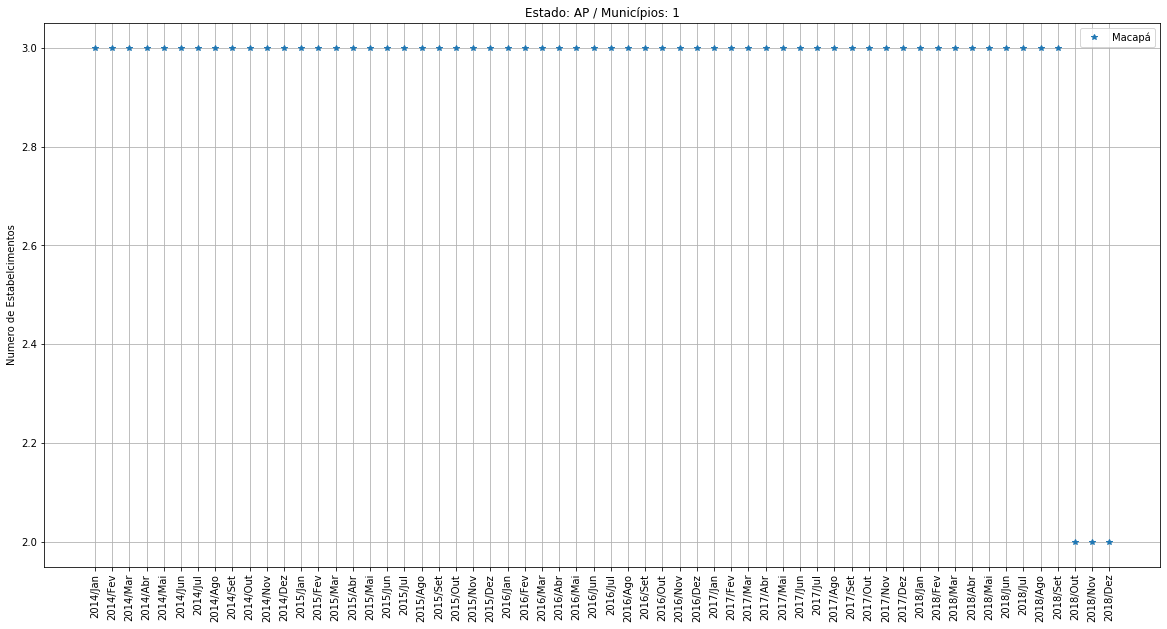

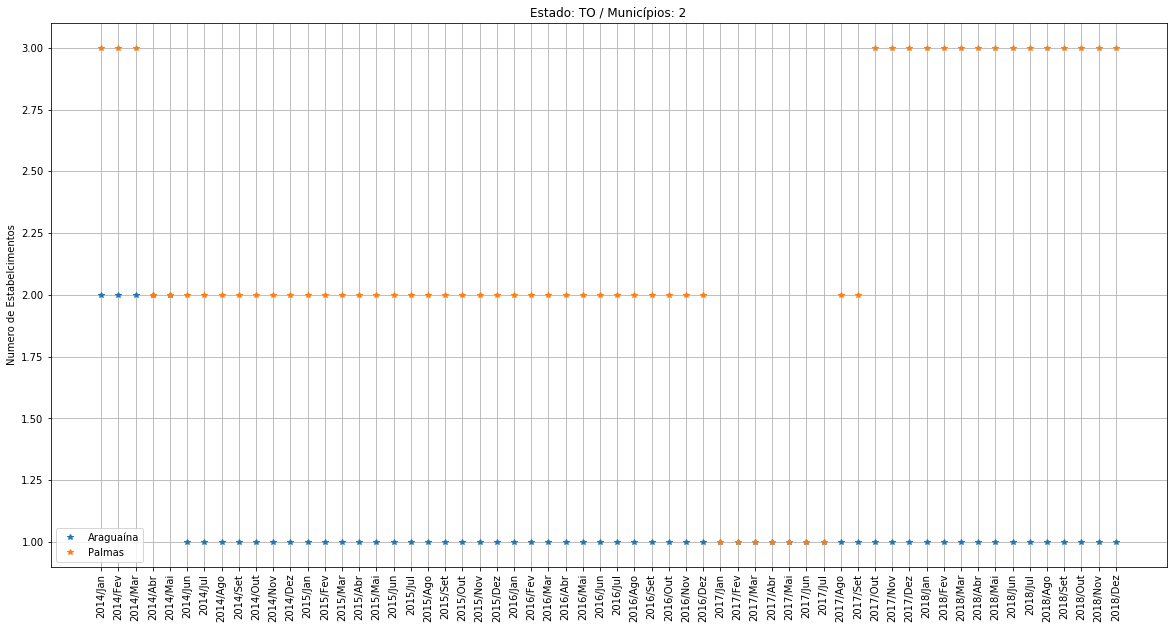

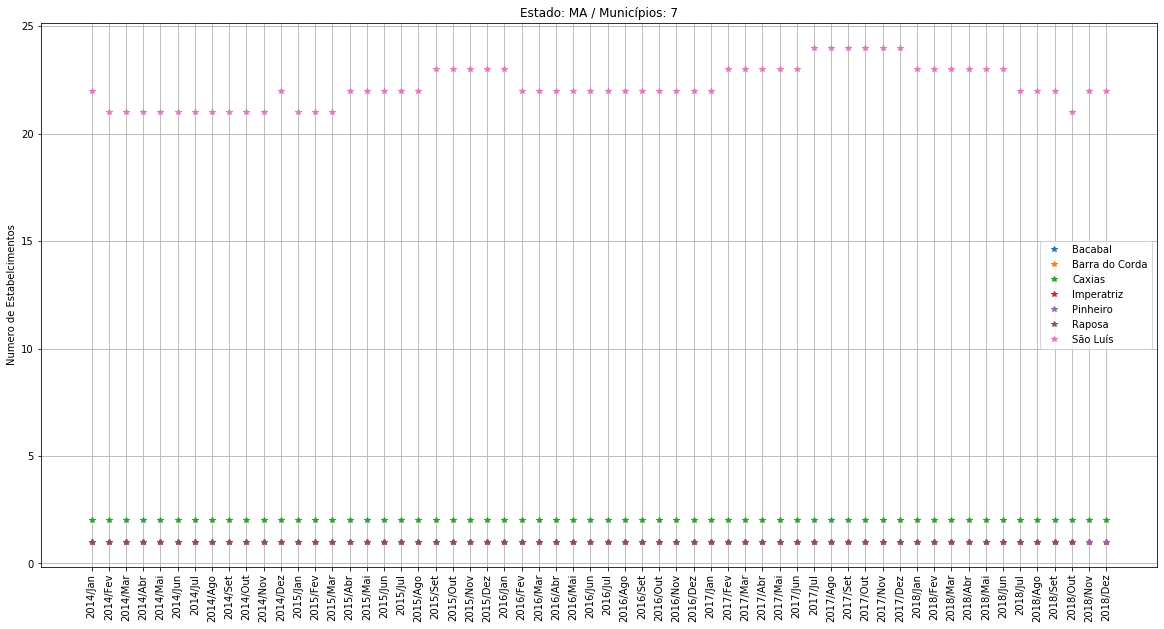

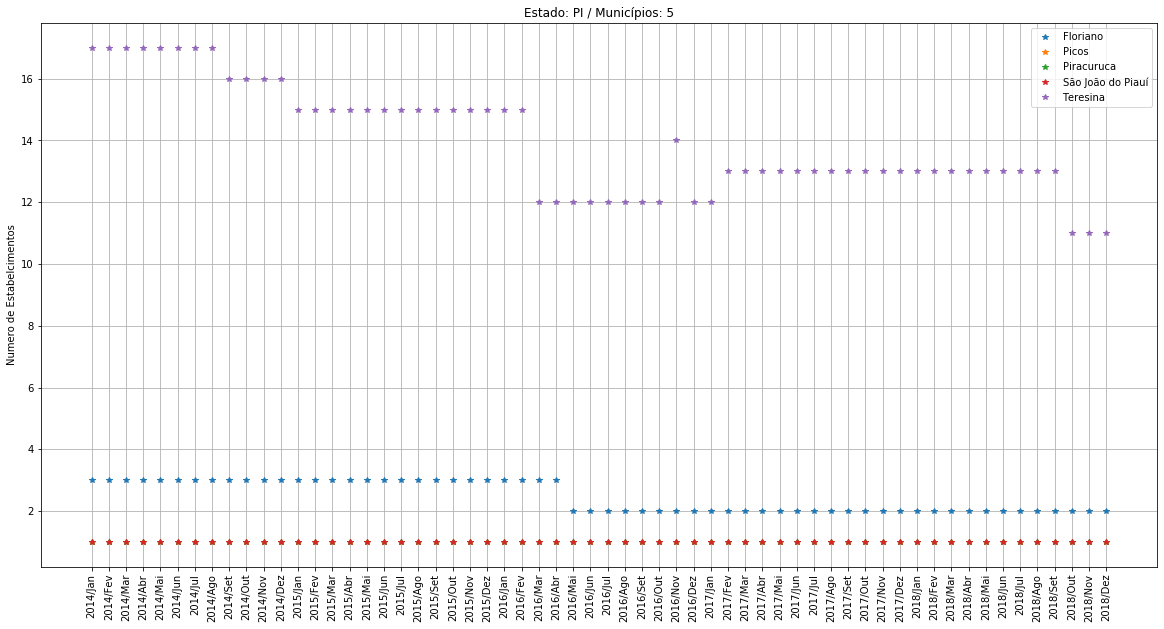

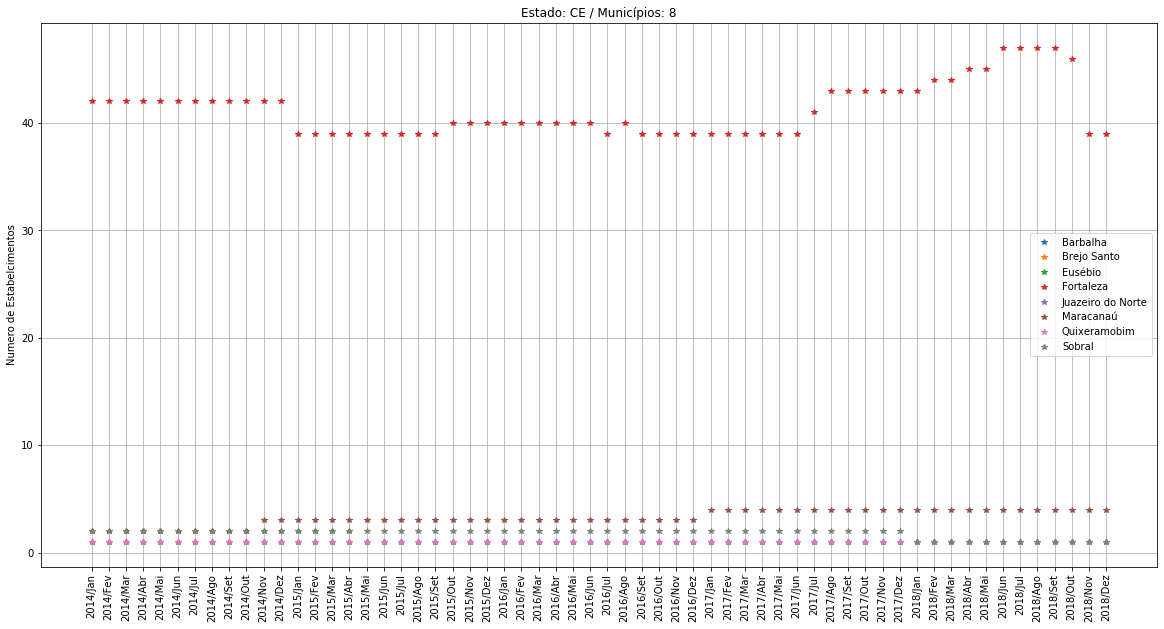

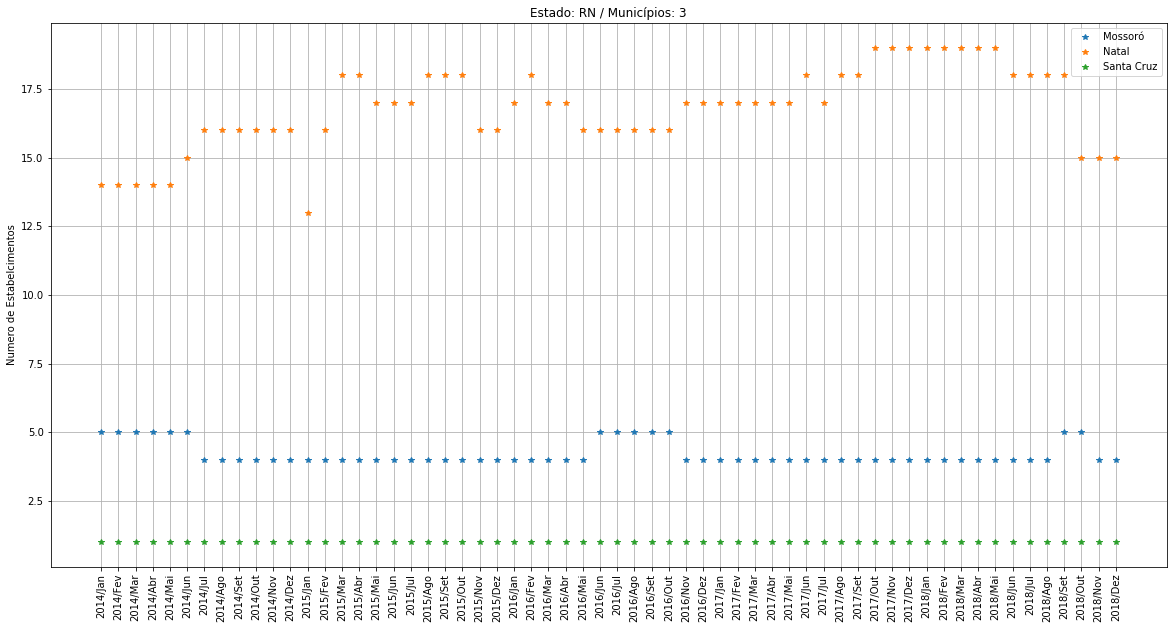

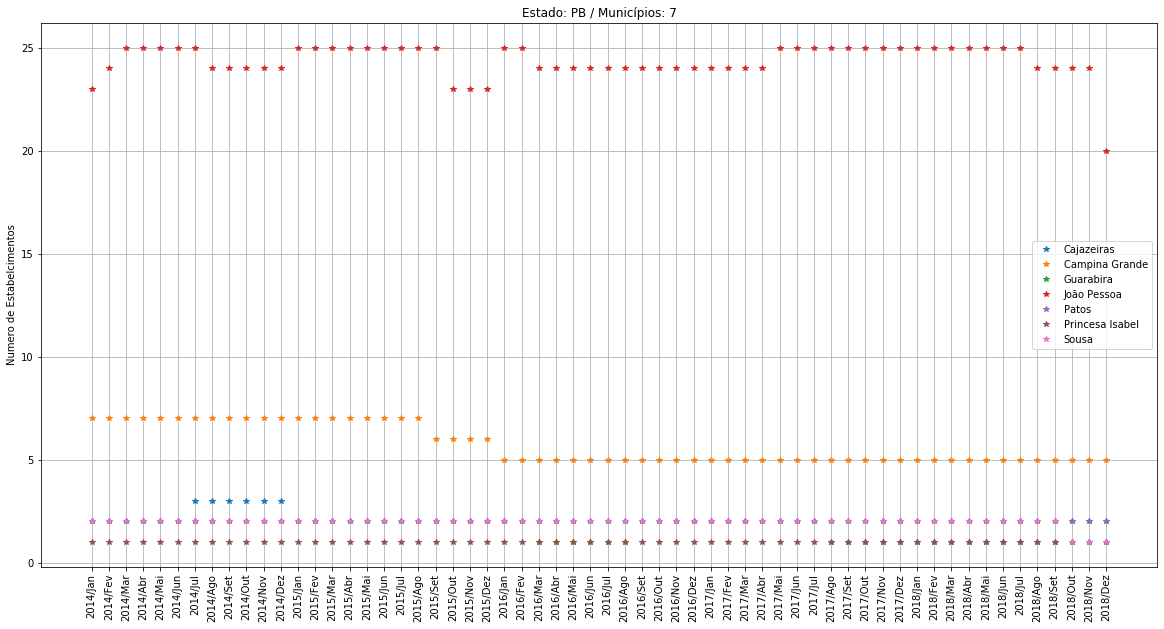

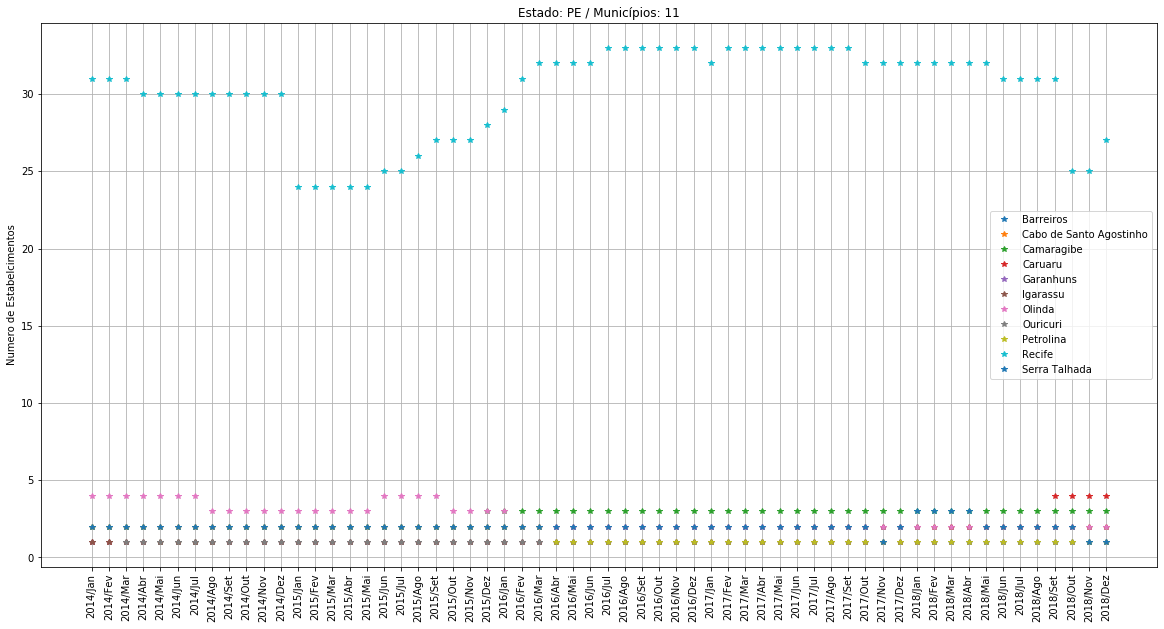

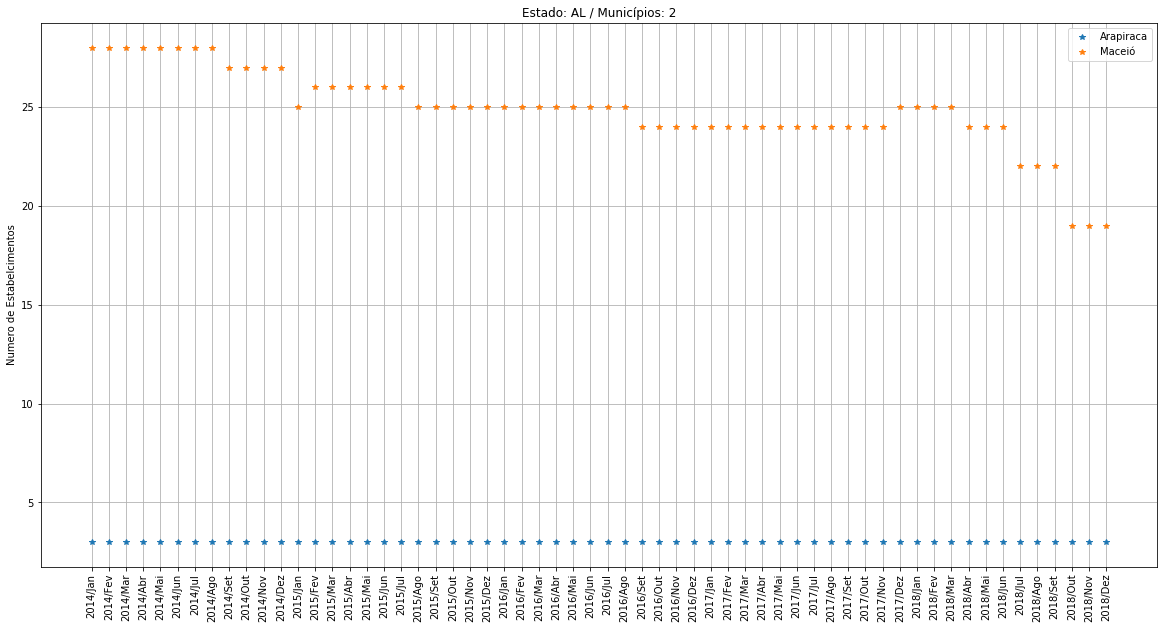

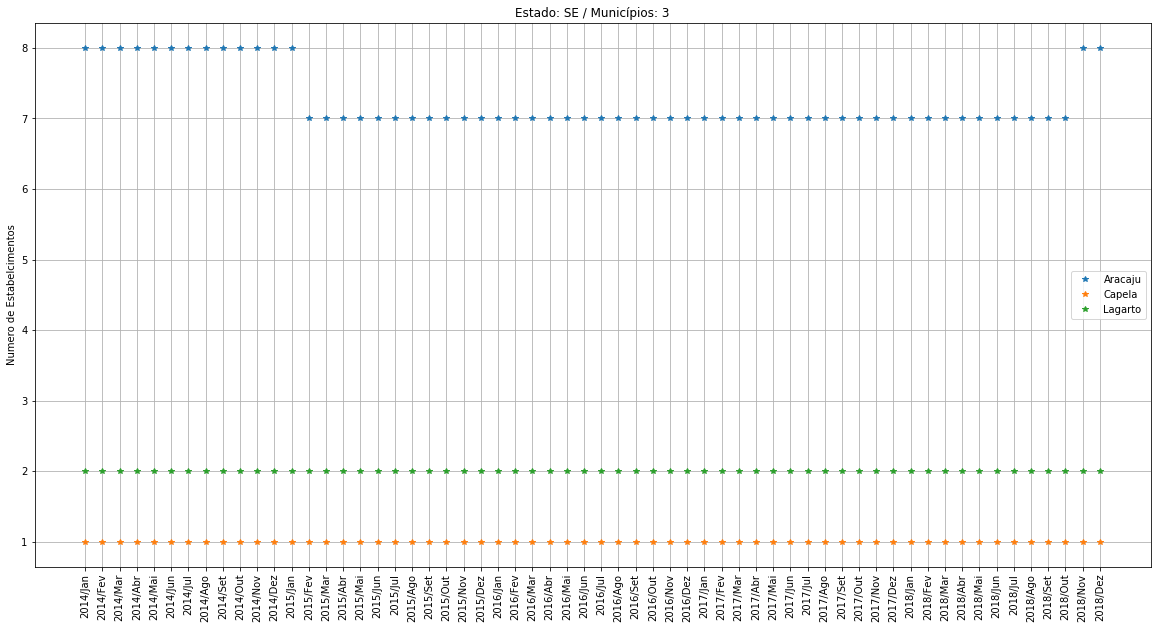

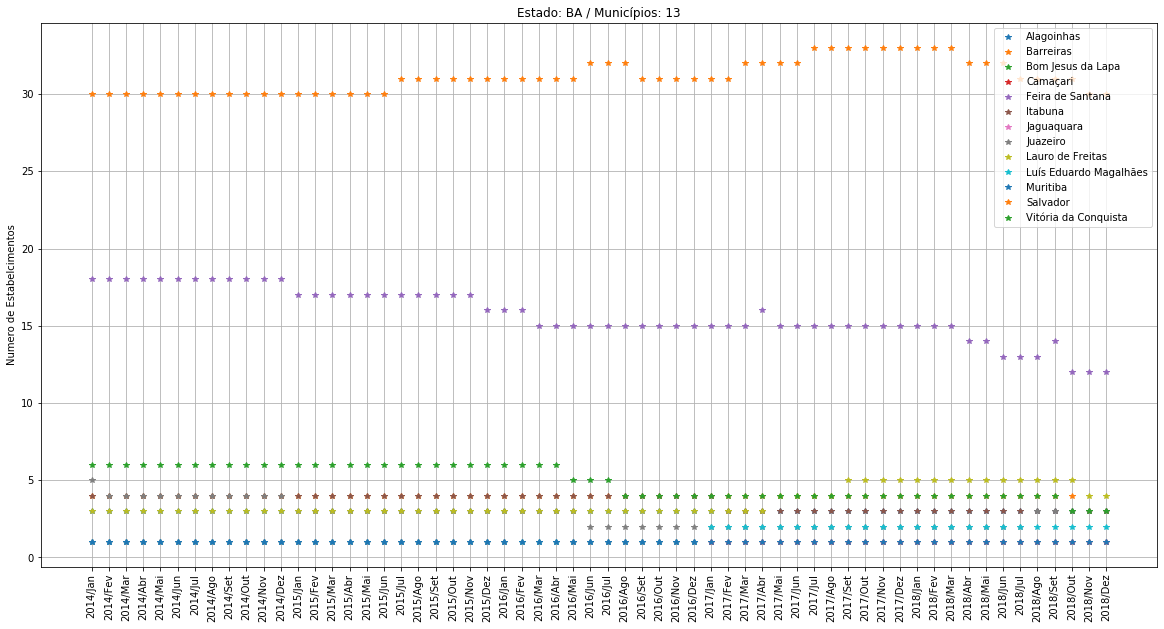

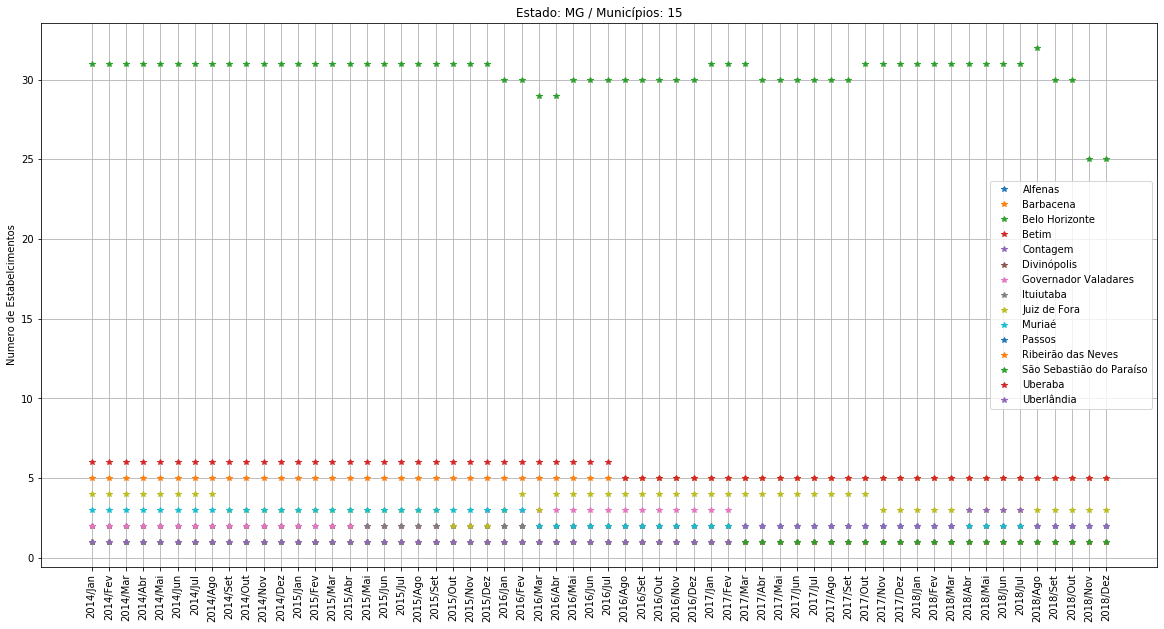

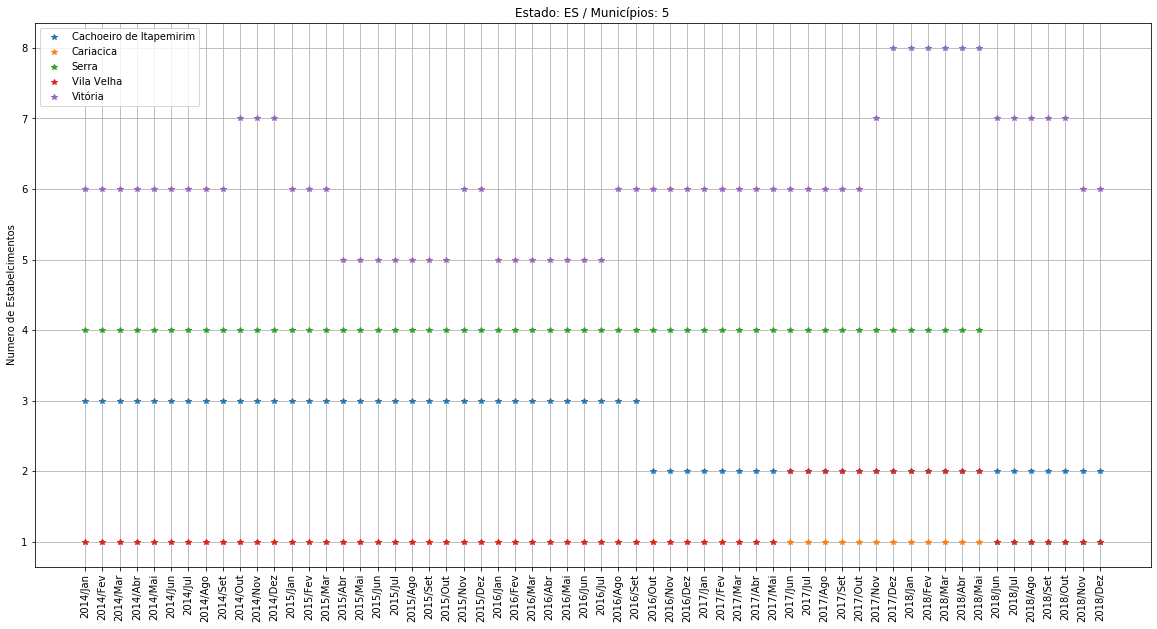

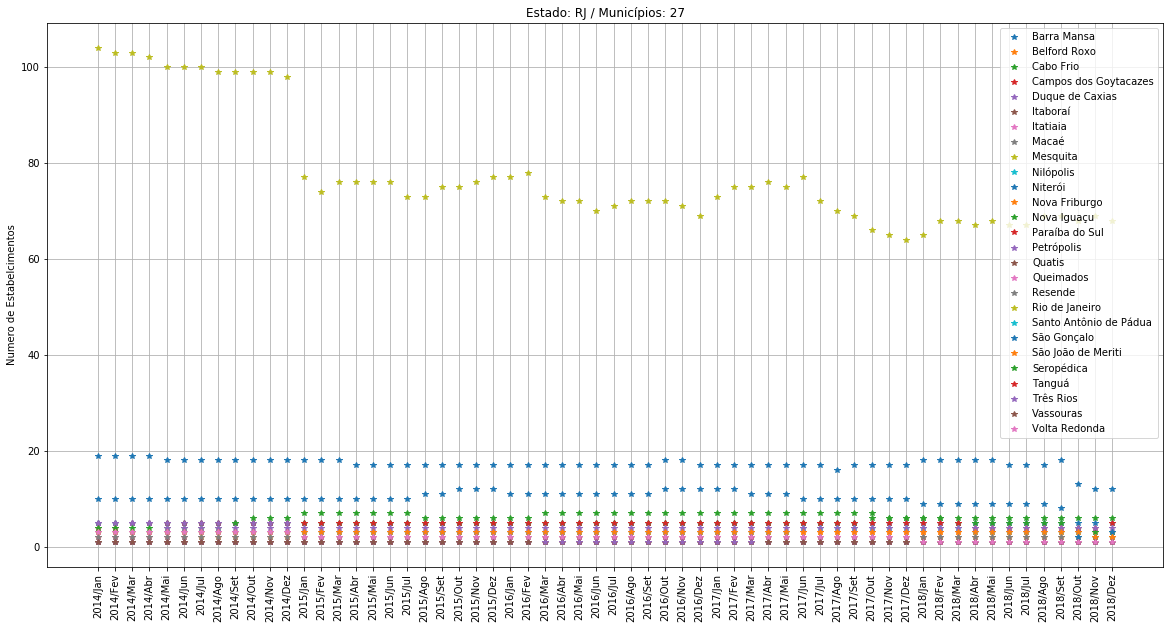

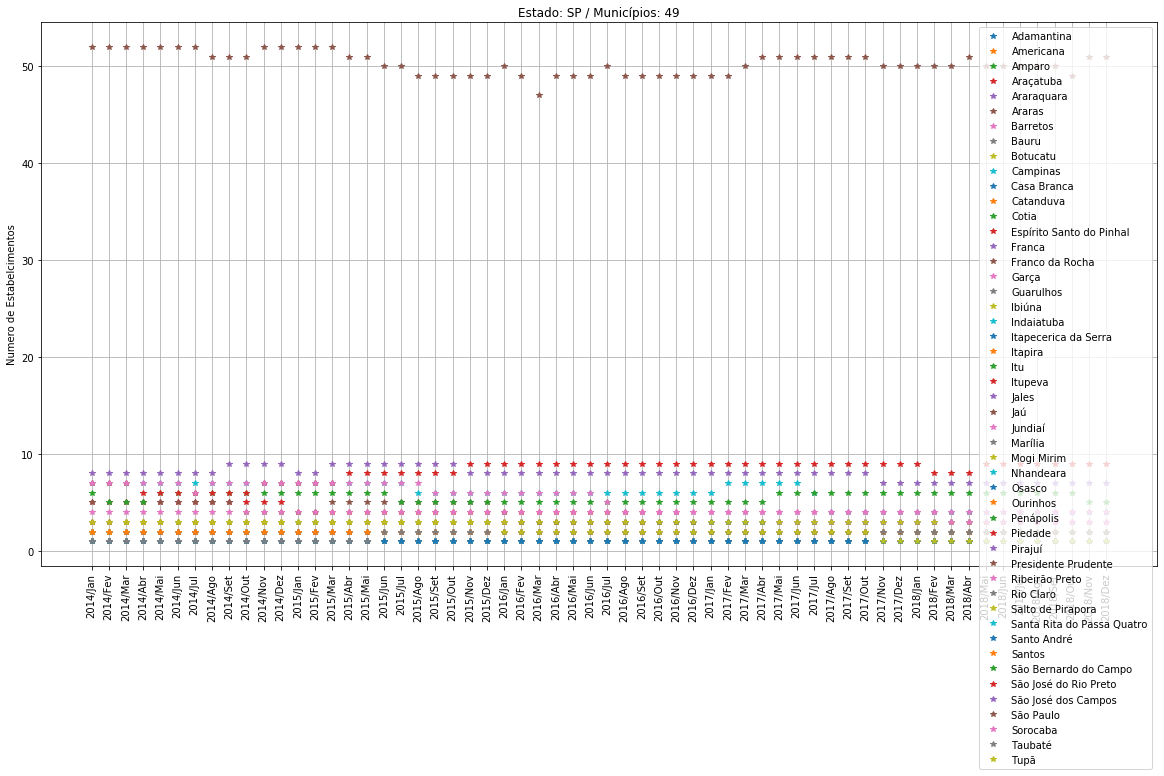

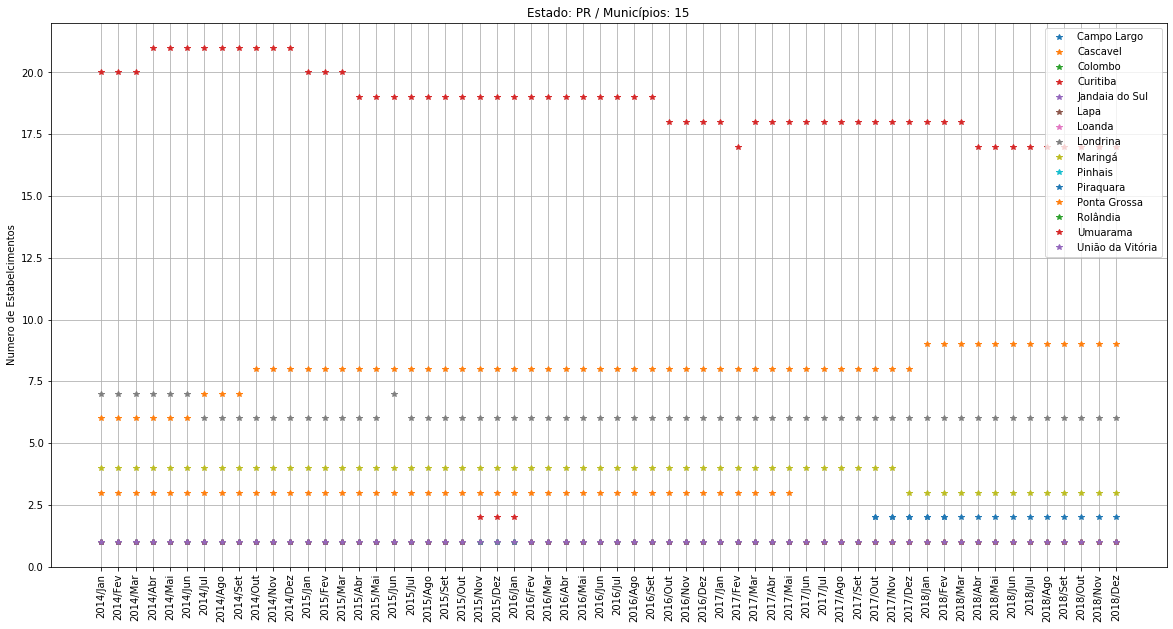

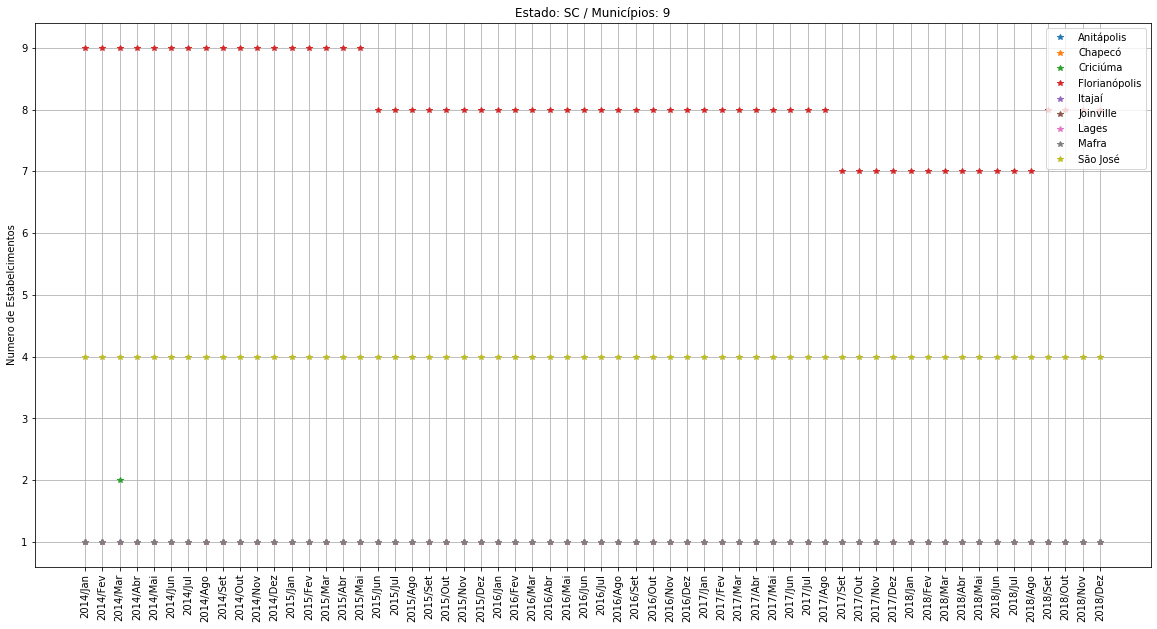

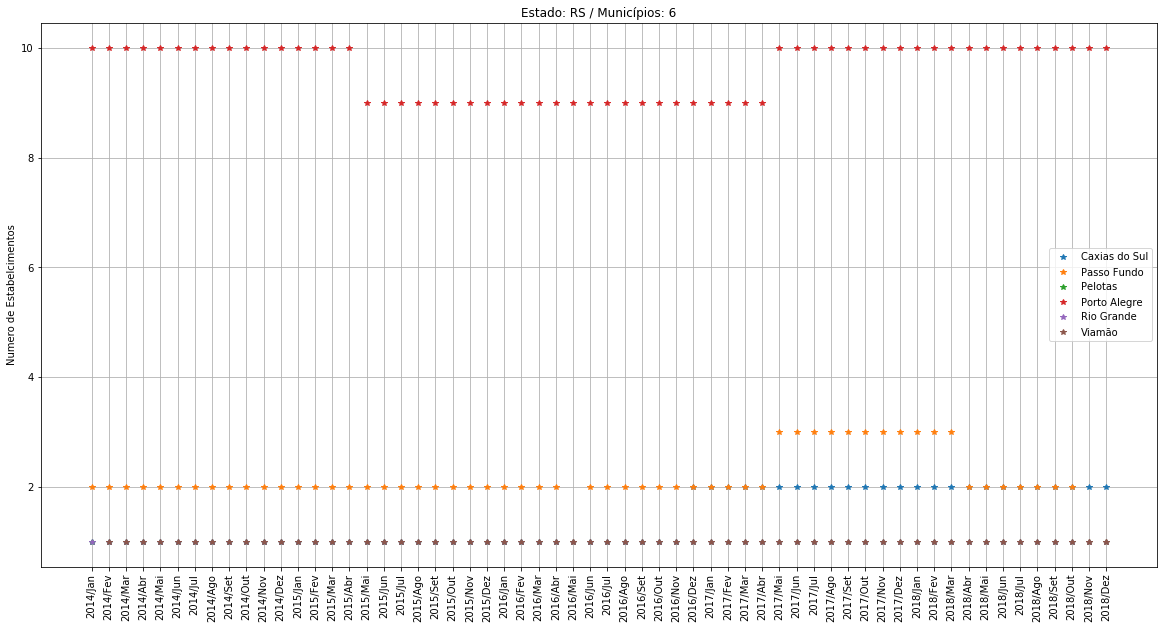

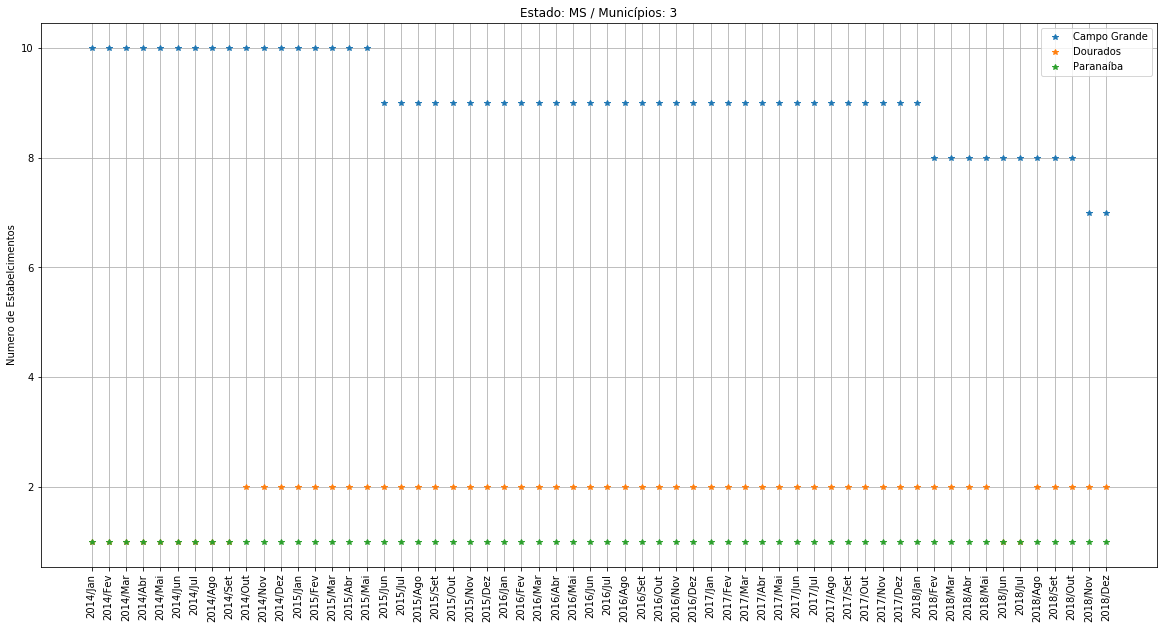

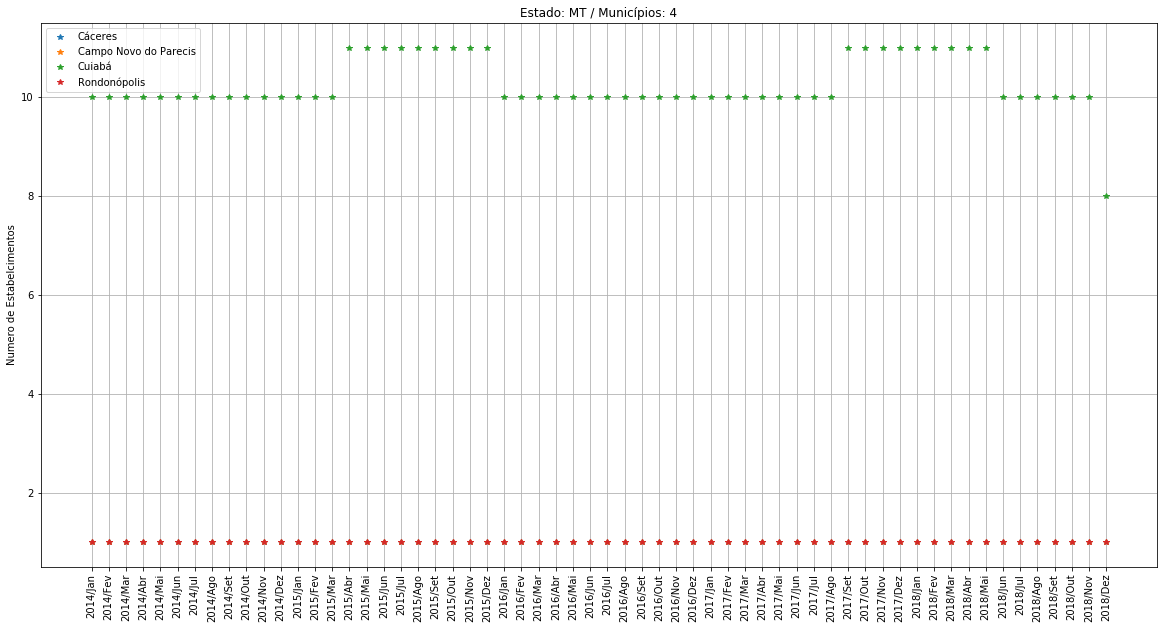

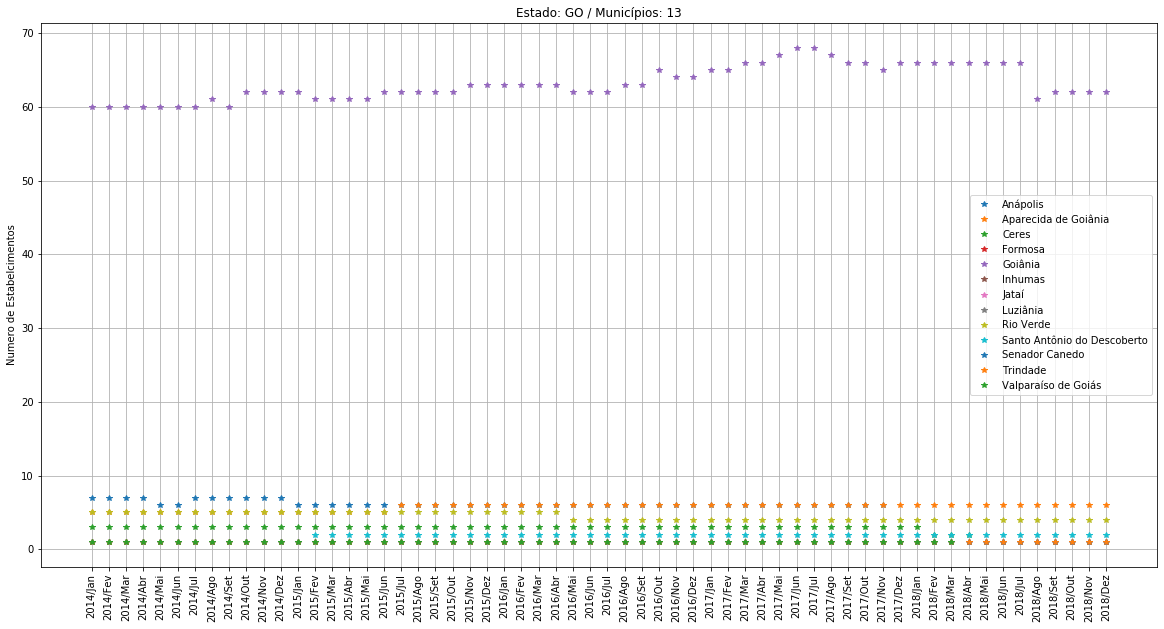

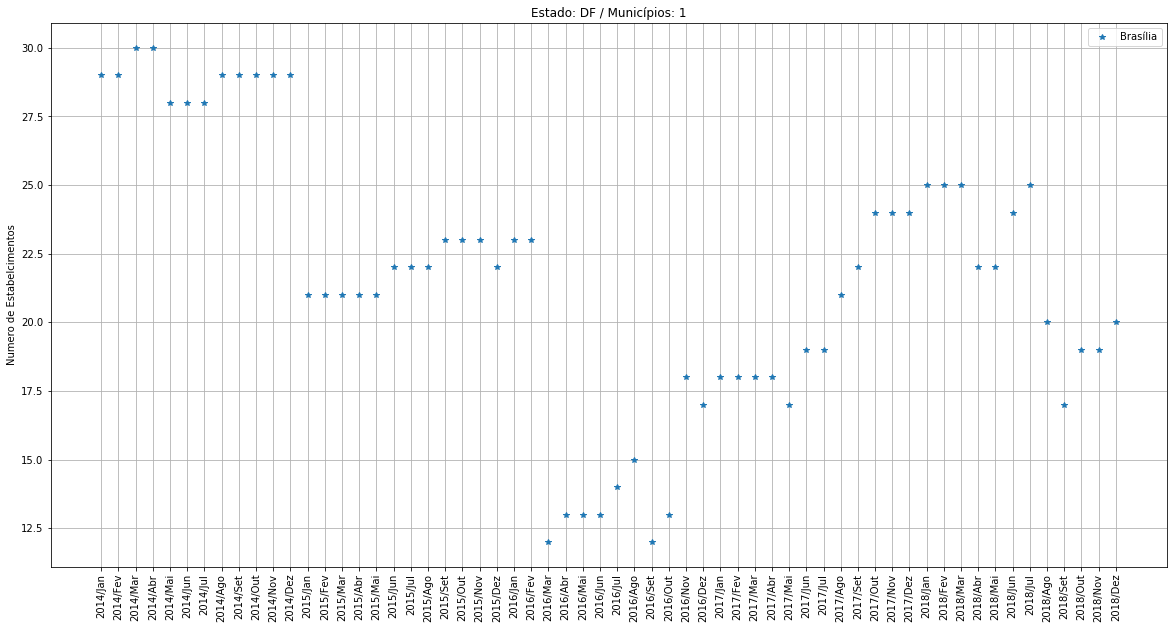

In [30]:
#New function -> Def 
new_names = ['2014/Jan', '2014/Fev', '2014/Mar', '2014/Abr', '2014/Mai', '2014/Jun', '2014/Jul', '2014/Ago', '2014/Set', '2014/Out', '2014/Nov', '2014/Dez',
             '2015/Jan', '2015/Fev', '2015/Mar', '2015/Abr', '2015/Mai', '2015/Jun', '2015/Jul', '2015/Ago', '2015/Set', '2015/Out', '2015/Nov', '2015/Dez',
             '2016/Jan', '2016/Fev', '2016/Mar', '2016/Abr', '2016/Mai', '2016/Jun', '2016/Jul', '2016/Ago', '2016/Set', '2016/Out', '2016/Nov', '2016/Dez',
             '2017/Jan', '2017/Fev', '2017/Mar', '2017/Abr', '2017/Mai', '2017/Jun', '2017/Jul', '2017/Ago', '2017/Set', '2017/Out', '2017/Nov', '2017/Dez',
             '2018/Jan', '2018/Fev', '2018/Mar', '2018/Abr', '2018/Mai', '2018/Jun', '2018/Jul', '2018/Ago', '2018/Set', '2018/Out', '2018/Nov', '2018/Dez']
#
for UF_num, Uf_sig in state_dict.items():
    est_hosp5 = est_hosp4.copy()
    est_hosp5 = est_hosp5[est_hosp5['Estado']== UF_num]
    
    values = est_hosp5.values
    values_np = est_hosp5.values[:,3:values.shape[1]] 
    tag = est_hosp5['Municipio'].values
    
    num_hosp = values_np.shape[0]
    
    plt.figure(figsize=(20, 10))
    for val in range(0,num_hosp):
        plt.plot(new_names, values_np[val,:],'*', label = str(tag[val]))
        
    plt.title('Estado: %s / Municípios: %s' %(Uf_sig, num_hosp))
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.ylabel('Numero de Estabelcimentos')
    plt.legend()
    plt.show()



### Lixo


In [ ]:
#Plot por estado / ano / describe
# Uf_sig = 11

# est_hosp5 = est_hosp4.copy()
# est_hosp5 = est_hosp5[est_hosp5['Estado']== 11]
# values = est_hosp5.values
# values_np = est_hosp5.values[:,3:values.shape[1]] 
# tag = est_hosp5['Municipio'].values
# num_hosp = values_np.shape[0]

# plt.figure(figsize=(20, 10))
# for val in range(0,num_hosp):
#     ai = tag[val]
#     plt.plot(new_names, values_np[val,:],'--',label = str(ai))
#     #plt.legend(tag[val],shadow=True, loc=(0.01, 0.48), handlelength=1.5, fontsize=16)
#     #plt.legend(tag[val],loc=(0.01, 0.48))
    
# plt.title('Estado: %s / Municípios: %s' %(Uf_sig, num_hosp))
# plt.ylabel('Numero de Estabelcimentos')
# plt.legend()
# plt.show()  
